# Example of grid based densities of the Milky Way and sampling source position

In [1]:
from crpropa import * 
import numpy as np
import matplotlib.pyplot as plt # optional for plotting
import matplotlib as mpl

from tqdm import trange # progressbar # alternative trange = range

In this example a mass distribution is loaded from a given grid and used for the sampling of the source position of the candidates. 
Here, we use the H2 distribution from [Mertsch & Vittino A&A 655, A64 (2021)](https://doi.org/10.1051/0004-6361/202141000). The original data can be found [here](https://zenodo.org/record/5501196) and have been converted to an CRPropa compatible format. The final data can be downloaded from the [additional rescources](https://ruhr-uni-bochum.sciebo.de/s/YD4wiiAdn3AK1SU). We use the the Model SBM15. 

## load grid

In [2]:
data_path = "H2_dens_mean_BEG03.txt" # path to the data file 

In [3]:
grid = loadGrid1fFromTxt(data_path)

## convert grid into a CRPropa mass distribution

In [4]:
isHI = False
isH2 = True
isHII = False
dens = DensityGrid(grid, isHI, isHII, isH2)
print(dens.getIsForHI(), dens.getIsForHII(), dens.getIsForH2())

False False True


### (optional) plotting

/tmp/ipykernel_9824/463811823.py:16: RuntimeWarning: divide by zero encountered in log10
  p = ax.pcolormesh(xRange, yRange, np.log10(dens_data).T)


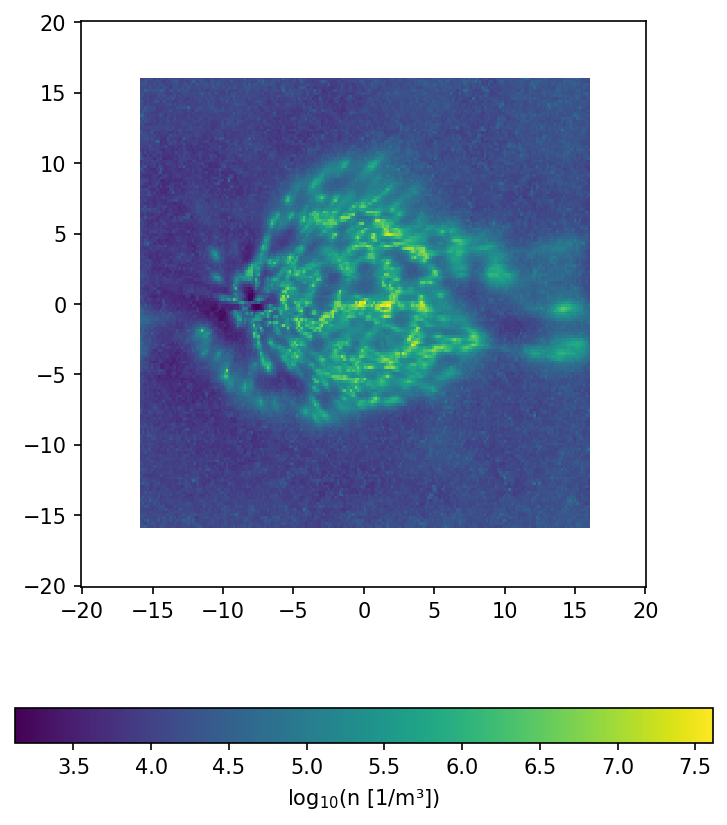

In [5]:
# xy plane
xRange = np.linspace(-20, 20, 250) 
yRange = np.linspace(-20, 20, 200)
zRange = np.linspace(-1, 1, 150)

## xy Plane -----------------------------------------------------------
dens_data = np.zeros((len(xRange), len(yRange)))
for iX, x in enumerate(xRange):
    for iY, y in enumerate(yRange):
        dens_data[iX, iY] = dens.getDensity(Vector3d(x,y,0)*kpc)


fig, ax = plt.subplots(dpi = 150, figsize=(6,7))

ax.set_aspect("equal")
p = ax.pcolormesh(xRange, yRange, np.log10(dens_data).T)

fig.colorbar(p, label="log$_{10}$(n [1/m³])", orientation = "horizontal")
plt.show()

/tmp/ipykernel_9824/2125385323.py:9: RuntimeWarning: divide by zero encountered in log10
  p = ax.pcolormesh(xRange, zRange, np.log10(dens_data).T)


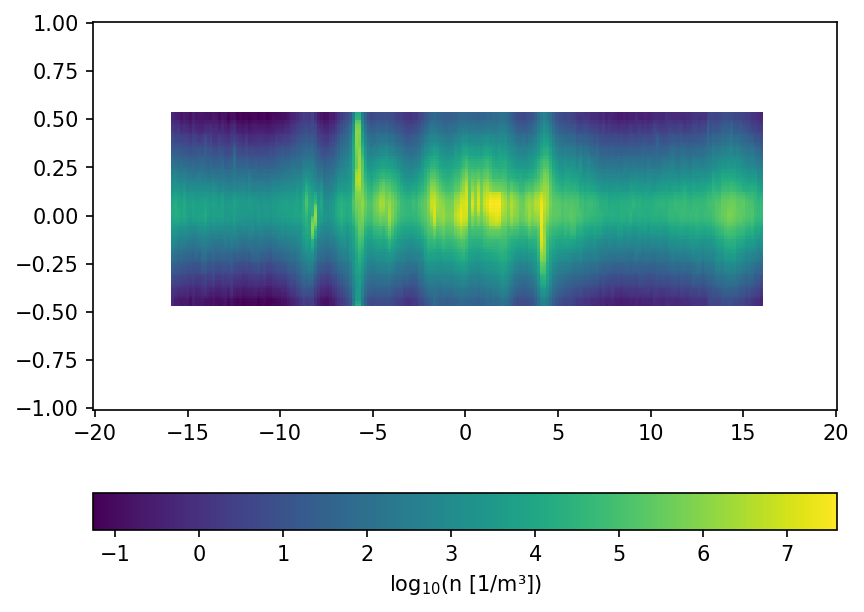

In [6]:
## xz Plane -----------------------------------------------------------
dens_data = np.zeros((len(xRange), len(zRange)))
for iX, x in enumerate(xRange):
    for iZ, z in enumerate(zRange):
        dens_data[iX, iZ] = dens.getDensity(Vector3d(x,0, z)*kpc)


fig, ax = plt.subplots(dpi = 150)
p = ax.pcolormesh(xRange, zRange, np.log10(dens_data).T)
fig.colorbar(p, orientation="horizontal", label="log$_{10}$(n [1/m³])")

plt.show()

# use a massdistribution as indicator for the spacial source distribution

The source feature <code> SourceMassDistribution </code> assumes that the distribution of the source positions follows the mass distribution. To sample the position the range in which the source is sampled and the maximal density in this volume has to be set. 
In the following example the impact of a (non correct) maximal density is show. Here one has also to denote, that a much to high estimated maximal density leads to a raising number of tries for the sampling. This leads to larger simulation times and the maimal number of tries has to be increesed by the user.

In [7]:
def sample_and_plot(maxDens = 1e6, maxTries =int(1e4)):
    s = Source()
    sourceFeature = SourceMassDistribution(dens, maxDens)
    sourceFeature.setXrange(-16*kpc, 16*kpc)
    sourceFeature.setYrange(-16*kpc, 16*kpc)
    sourceFeature.setZrange(-0.5*kpc, 0.5*kpc)
    sourceFeature.setMaximalTries(int(maxTries))
    s.add(sourceFeature)

    positions = []
    for i in trange(int(5e5)): 
        pos = s.getCandidate().source.getPosition()
        if(abs(pos.z) < 50 * pc):
            positions.append((pos.x, pos.y))

    positions = np.array(positions, dtype=[("X",float),("Y",float)])

    # crosscheck with plotting 

    fig, ax = plt.subplots(dpi = 100)
    ax.set_aspect("equal")

    n_bin = 250
    p = ax.hist2d(positions["X"]/kpc, positions["Y"]/kpc, bins=n_bin, norm = mpl.colors.LogNorm())
    plt.title("max density: {:.1e}".format(maxDens) + " m$^{-3}$")
    fig.colorbar(p[-1])
    plt.show()


  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 500000/500000 [00:01<00:00, 264676.36it/s]


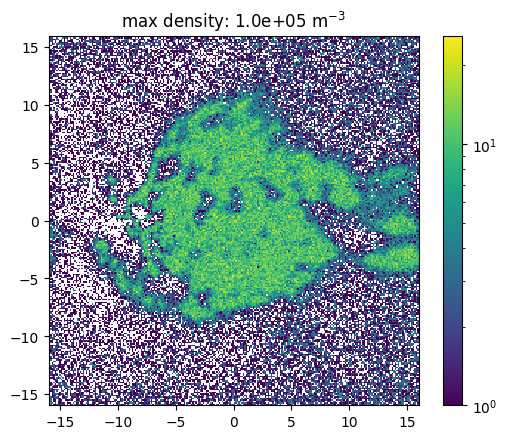

100%|██████████| 500000/500000 [00:05<00:00, 85160.64it/s]


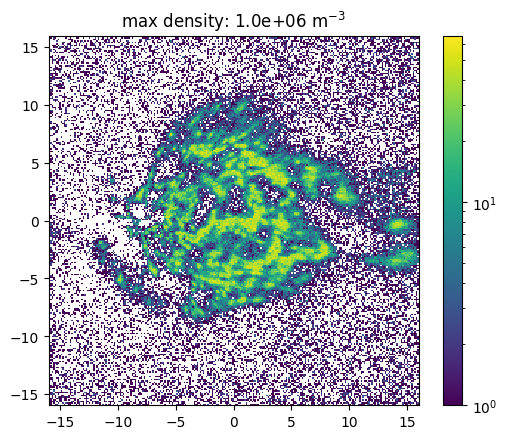

100%|██████████| 500000/500000 [00:34<00:00, 14299.87it/s]


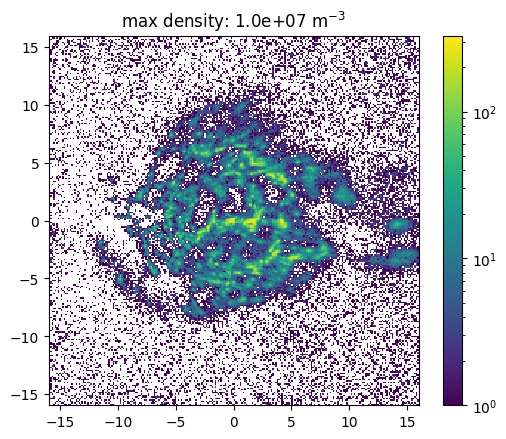

100%|██████████| 500000/500000 [02:04<00:00, 4014.01it/s]


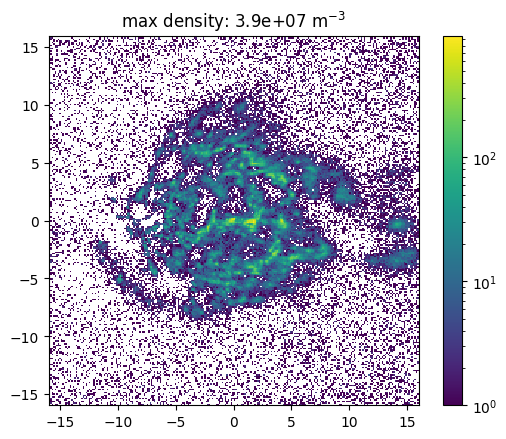

100%|██████████| 500000/500000 [05:13<00:00, 1596.09it/s]


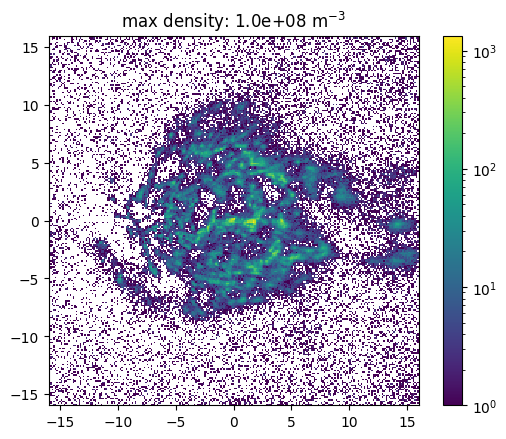

In [8]:
sample_and_plot(1e5)
sample_and_plot(1e6)
sample_and_plot(1e7)
sample_and_plot(np.max(dens_data), 1e5)
sample_and_plot(1e8, 1e5)